### Chargement des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

### Données

In [8]:
Xinit=np.array([[1,1],[1,0],[0,1],[0,0]])
Yinit=np.array([1,1,0,0])
n=4

ou

In [4]:
Xinit, Yinit = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=2)
n=int(2*len(Xinit)/3)

<function matplotlib.pyplot.show(*args, **kw)>

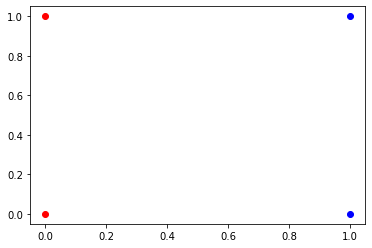

In [9]:
X=Xinit[0:n]
Y=Yinit[0:n]
d=len(X[1])
mask1=(Y==0)
mask0=(Y==1)
plt.scatter(X[mask1,0],X[mask1,1],c='r') #Y=1 en rouge
plt.scatter(X[mask0,0],X[mask0,1],c='b') #Y=0 en bleu
plt.show

## Fonction sigmoïde

On pose, pour tout $x\in\mathbb{R}$, $$\sigma(x)=\frac{1}{1+e^{-x}}.$$

Pour $y\in\{0,1\}$, remarquer : 
$$\begin{array}{rl}
L_y(x)\stackrel{\text{def}}{=}&-y\log(\sigma(x))-(1-y)\log(1-\sigma(x))\\
=&\left\{\begin{array}{l}
\underbrace{-\log(\sigma(x))}_{\text{ si }y=1}=\left\{\begin{array}{l}-\log(\simeq 0)\to +\infty\text{ si }x\to -\infty\\-\log(\simeq 1)\to 0\text{ si }x\to+\infty\end{array}\right.\\
\underbrace{-\log(1-\sigma(x))}_{\text{ si }y=0}=\left\{\begin{array}{l}-\log(\simeq 1)\to 0\text{ si }x\to -\infty\\-\log(\simeq 0)\to +\infty\text{ si }x\to+\infty\end{array}\right.\\
\end{array}\right.
\end{array}$$

Par conséquent l'expression $L_y(x)$ est d'autant plus grande qu'elle s'éloigne des situations [$y=1$ et $x=+\infty$] ou [$y=0$ et $x=-\infty$].


## Fonctions objectif et gradient



On cherche $(b,w_1,w_2)$ tel que pour chacun des points $X_i=\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}$ et leur valeur $Y_i\in\{0,1\}$, 
$$\begin{array}{rl}
&\sigma(b+w_1X_{i1}+w_2X_{i2})\simeq Y_i\\
\iff&\sigma\left(b+\begin{pmatrix}X_{i1}&X_{i2}\end{pmatrix}\cdot \begin{pmatrix}w_1\\w_2\end{pmatrix}\right)\simeq Y_i\\
\iff&\sigma\left(b+X_i\cdot W\right)\simeq Y_i
\end{array}.$$

Pour ce faire, on minimise l'opposé de la log-vraisemblance :
$$\begin{array}{rl}
L_{(X,Y)}(b,W)=&\sum_i L_{Y_i}(b+X_i\cdot W)\\
=&\sum_i\left(-Y_i\log(\sigma(b+X_i\cdot W))-(1-Y_i)\log(1-\sigma(b+X_i\cdot W))\right)\\
=&\sum_i\left(-Y_i\log\left(\frac{1}{1+e^{-(b+X_i\cdot W)}}\right)-(1-Y_i)\log\left(1-\frac{1}{1+e^{-(b+X_i\cdot W)}}\right)\right)\\
=&\sum_i\left(Y_i\log\left(1+e^{-(b+X_i\cdot W)}\right)-(1-Y_i)\log\left(\frac{e^{-(b+X_i\cdot W)}}{1+e^{-(b+X_i\cdot W)}}\right)\right)\\
=&\sum_i\left(Y_i\log\left(1+e^{-(b+X_i\cdot W)}\right)-(1-Y_i)\left(-(b+X_i\cdot W)-\log\left(1+e^{-(b+X_i\cdot W)}\right)\right)\right)\\
=&\sum_i\left(Y_i\log\left(1+e^{-(b+X_i\cdot W)}\right)+(1-Y_i)(b+X_i\cdot W)+(1-Y_i)\log\left(1+e^{-(b+X_i\cdot W)}\right)\right)\\
=&\sum_i\left(\log\left(1+e^{-(b+X_i\cdot W)}\right)+(1-Y_i)(b+X_i\cdot W)\right)
\end{array}$$

On a :
$$\begin{array}{rl}
\frac{\partial L(b,W)}{\partial b}=&\sum_i \frac{-e^{-(b+X_i\cdot W)}}{1+e^{-(b+X_i\cdot W)}}+(1-Y_i)
\end{array}$$
et pour chaque $w_j$, $j\in\{1,2\}$, on a :
$$\frac{\partial L(b,W)}{\partial w_j}=\sum_i  \frac{-X_{ij}e^{-(b+X_i\cdot W)}}{1+e^{-(b+X_i\cdot W)}}+(1-Y_i)X_{ij}$$

In [66]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logvrai(b,W):
    XdotW=np.dot(X,W)
    B=[b for i in range(len(X))]
    bpXdotW=B+XdotW
    return sum([Y[i]*np.log(sigmoid(bpXdotW[i]))+(1-Y[i])*np.log(1-sigmoid(bpXdotW[i])) for i in range(len(X))])  

def f(b,W):
    XdotW=np.dot(X,W)
    B=[b for i in range(len(X))]
    bpXdotW=B+XdotW
    return sum([np.log(1+np.exp(-(bpXdotW[i])))+(1-Y[i])*(bpXdotW[i]) for i in range(len(X))])  
def df(b,W):
    XdotW=np.dot(X,W)
    B=[b for i in range(len(X))]
    ebpXdotW=np.exp(-(B+XdotW))
    L=[sum([-ebpXdotW[i]/(1+ebpXdotW[i])+1-Y[i] for i in range(len(X))])]
    for j in range(2):
        L.append(sum([-X[i][j]*ebpXdotW[i]/(1+ebpXdotW[i])+X[i][j]*(1-Y[i]) for i in range(len(X))]))
    return L

### Algorithme

In [67]:
def descente(gradf,b=0,W=[1,1],tau=0.0001,tolerance=1e-6,Nbiterations=1000):
    L=[]
    for i in range(Nbiterations):
        g = gradf(b,W)
        if g[0]**2+g[1]**2+g[2]**2< tolerance:
            print('L\'algorithme a convergé.\n Solution atteinte:\n b=',b,'\n W=',W,'\n gradient:',g)
            print(logvrai(b,W))
            return L        
        L.append([b,W])        
        b=b-tau*g[0]
        W=[W[0]-tau*g[1],W[1]-tau*g[2]]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte:\n b=',b,'\n W=',W,'\n gradient:',g)
    print(logvrai(b,W))
    return L

### Calcul de la solution

In [88]:
Xi=descente(df,-10,[30,-10],1e-2,1e-5,1000)

L'algorithme a convergé.
 Solution atteinte:
 b= -10 
 W= [30, -10] 
 gradient: [0.0, -4.5399929856052586e-05, -4.539580754885325e-05]
-9.080192074091881e-05


In [65]:
sigmoid(-13+8)

0.0066928509242848554

### Représentation graphique de l'algorithme et de la solution

<function matplotlib.pyplot.show(*args, **kw)>

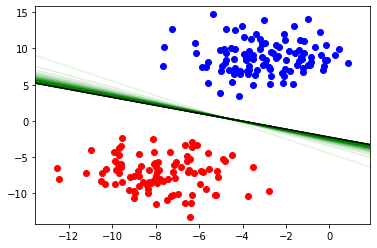

In [24]:
plt.scatter(X[mask1,0],X[mask1,1],c='r')
plt.scatter(X[mask0,0],X[mask0,1],c='b')
x1_values=np.linspace(np.min(X[:,0])-1,np.max(X[:,0])+1,20)
x2_values=np.linspace(np.min(X[:,1])-1,np.max(X[:,1])+1,20)
for i in np.linspace(0,len(Xi)-1,30):
    S=Xi[i.astype(int)]
    fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])
    plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=0.1+0.899*i/(len(Xi)-1))
S=Xi[len(Xi)-1]
fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['black'],alpha=1)
plt.show

Erreur moyenne : 0.0


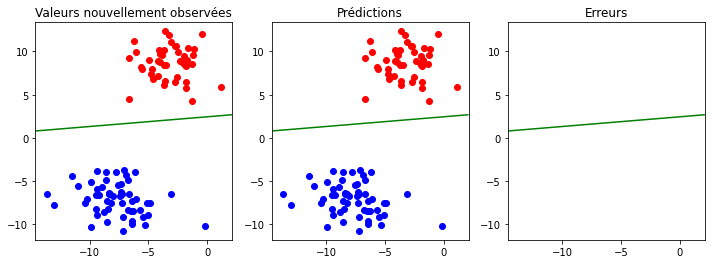

In [20]:
S=Xi[len(Xi)-1]
Xv=Xinit[n:len(Xinit)]
Yv=Yinit[n:len(Yinit)]

# Données
maskv1=[Yv[i]==1 for i in range(len(Yv))]
maskv0=[Yv[i]==0 for i in range(len(Yv))]

# Prédictions
maskp1=[S[0]+S[1][0]*Xv[i][0]+S[1][1]*Xv[i][1]>=0.5 for i in range(len(Xv))]
maskp0=[S[0]+S[1][0]*Xv[i][0]+S[1][1]*Xv[i][1]<0.5 for i in range(len(Xv))]

# Erreurs
maske1=[(maskv1[i]==True and maskp1[i]==False) for i in range(len(maskv1))]
maske0=[(maskv0[i]==True and maskp0[i]==False) for i in range(len(maskv0))]

# Représentation graphique de la solution
x1_values=np.linspace(np.min(Xv[:,0])-1,np.max(Xv[:,0])+1,20)
x2_values=np.linspace(np.min(Xv[:,1])-1,np.max(Xv[:,1])+1,20)
fct_values = np.array([[S[0]+S[1][0]*x1+S[1][1]*x2 for x1 in x1_values] for x2 in x2_values])

plt.figure(figsize=(12,4)) #créer une figure

plt.subplot(1,3,1) #créer des sous-graphe : 1 ligne, 2 colonnes, et selectionne le 1er graphe pour la suite
plt.scatter(Xv[maskv1,0],Xv[maskv1,1],c='r')
plt.scatter(Xv[maskv0,0],Xv[maskv0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Valeurs nouvellement observées')

plt.subplot(1,3,2)
plt.scatter(Xv[maskp1,0],Xv[maskp1,1],c='r')
plt.scatter(Xv[maskp0,0],Xv[maskp0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Prédictions')

plt.subplot(1,3,3)
plt.scatter(Xv[maske1,0],Xv[maske1,1],c='r')
plt.scatter(Xv[maske0,0],Xv[maske0,1],c='b')
plt.contour(x1_values,x2_values,fct_values,levels=[0.5],colors=['g'],alpha=1)
plt.title('Erreurs')
plt.show

# Calcul du nombre d'erreurs
# np.count_nonzero retourne le nombre d'éléments non égaux à False
print("Erreur moyenne :",(np.count_nonzero(maske0)+np.count_nonzero(maske1))/len(Xv))
